PT Transjakarta - Ananda Rahmah Fauziyah JCDSOL-014

# **Latar Belakang**

PT Transjakarta merupakan perusahaan yang mengelola sistem transportasi Bus Rapid Transit (BRT) di Jakarta, Indonesia. Transjakarta menjadi sistem BRT pertama di Asia Tenggara dan bertujuan untuk menyediakan transportasi umum yang efisien, aman, dan terjangkau bagi masyarakat Jakarta. Transjakarta memiliki peran penting dalam mengatasi kemacetan dan meningkatkan mobilitas di Jakarta. 

Seiring dengan pertumbuhan populasi dan urbanisasi yang cepat, permintaan akan layanan transportasi yang efisien dan dapat diandalkan juga meningkat. Untuk memenuhi kebutuhan ini, Transjakarta perlu memahami pola penumpang, kinerja operasional, dan faktor-faktor yang mempengaruhi penggunaan layanannya. 

Analisis data yang efektif dapat memberikan wawasan yang berharga untuk pengambilan keputusan yang lebih baik, baik dalam hal penjadwalan, alokasi sumber daya, maupun perencanaan strategis jangka panjang.

# **Pernyataan Masalah**

Meskipun Transjakarta telah beroperasi dengan cukup baik, masih terdapat beberapa tantangan yang perlu diatasi untuk meningkatkan layanan dan efisiensi operasional. Berikut adalah beberapa permasalahan:

1. Menganalisa efisiensi rute dan penggunaan sumber daya
    
    Rute yang kurang efisien dan penggunaan sumber daya yang tidak optimal dapat meningkatkan biaya operasional dan mengurangi efektivitas layanan.
    
2. Menganalisa pengelolaan penumpang selama jam sibuk (rush hour)
    
    Ketidakmampuan untuk mengelola lonjakan penumpang selama jam sibuk dapat menyebabkan kepadatan yang berlebihan dan pengalaman penumpang yang buruk.


### Stakeholder

1. **Manajemen Transjakarta**

    Manajemen transjakarta bertanggung jawab atas operasional sehari-hari dan perencanaan strategis layanan BRT. Selain itu, mereka membutuhkan wawasan untuk perbaikan operasional dan peningkatan layanan

2. **Penumpang Transjakarta**

    Penumpang Transjakarta merupakan pengguna Utama dari layanan transjakarta dan menginginkan layanan yang dapat diandalkan, nyaman, dan tepat Waktu.

### Tujuan Analisa

Berdasarkan pernyataan masalah di atas, tujuan dari analisisnya yaitu:
1. **Optimalisasi Rute dan Penggunaan Sumber Daya**

    Menemukan cara untuk mengoptimalkan rute dan penggunaan sumber daya untuk meningkatkan efisiensi operasional
    
2. **Manajemen Penumpang Selama Jam Sibuk**

    Mengembangkan strategi untuk mengelola penumpang selama jam sibuk guna mengurangi kepadatan dan meningkatkan kenyamanan


# **DATA**
Untuk menyelesaikan permasalahan tersebut, terlebih dulu mengenal dataset. Dalam notebook ini menggunakan dataset Transjakarta yang dapat diakses [di sini](https://drive.google.com/file/d/1g7otxUatENCaEpoXqj7WSRQoy4MhFqZF/view?usp=sharing)

**Dataset Detail**

Detail untuk Row Data pada dataset Transjakarta sebagai berikut.

| Nama Kolom            | Deskripsi                                                                 |
|--------------------------|--------------------------------------------------------------------------|
| `transID`               | ID unik transaksi untuk setiap transaksi                                  |
| `payCardID`                   | Identifikasi utama dari penumpang. Kartu yang digunakan penumpang sebagai tiket untuk masuk dan keluar                                                          |
| `payCardBank`            | Nama bank penerbit kartu pembayaran milik penumpang                               |
| `payCardName`               | Nama penumpang yang ada di kartu                                          |
| `payCardSex`        | Jenis Kelamin Penumpang yang ada di kartu                                       |
| `payCardBirthDate`   | Tahun Kelahiran Penumpang                            |
| `corridorID`            | ID Koridor / ID Rute sebagai kunci untuk pengelompokkan rute                                     |
| `corridorName`           | Nama koridor / Nama Rute berisi Mulai dan Selesai untuk setiap Rute                      |
| `direction`         | 0 untuk Pergi, 1 untuk Pulang. Arah Rute                        |
| `tapInStops`        | ID halte tempat penumpang melakukan Tap Masuk        |
| `tapInStopsName` | Nama Halte tempat penumpang melakukan Tap Masuk                  |
| `tapInStopsLat`         | Latitude (Garis Lintang) dari halte tempat penumpang melakukan Tap Masuk       |
| `tapInStopsLon`           | Longitude (Garis Bujur) dari halte tempat penumpang melakukan Tap Masuk                             |
| `stopStartSeq`     | Posisi halte awal dalam rute perjalanan penumpang pada saat melakukan Tap Masuk |
| `tapInTime`            | Waktu penumpang melakukan Tap Masuk yang mencakup tanggal dan jam |
| `tapOutStops`      | ID halte tempat penumpang melakukan Tap Keluar |
| `tapOutStopsName`      | Nama Halte tempat penumpang melakukan Tap Keluar |
| `tapOutStopsLat`      | Latitude (Garis Lintang) dari halte tempat penumpang melakukan Tap Keluar |
| `tapOutStopsLon`      | Longitude (Garis Bujur) dari halte tempat penumpang melakukan Tap Keluar |
| `stopEndSeq`      | Posisi halte akhir dalam rute perjalanan penumpang pada saat melakukan Tap Keluar |
| `tapOutTime`      | Waktu penumpang melakukan Tap Keluar yang mencakup tanggal dan jam |
| `payAmount`      | Jumlah yang dibayarkan penumpang. Beberapa gratis. Beberapa berbayar. |


### **Import Libraries & Load Dataset**

Import Libraries yang dibutuhkan dalam notebook ini.

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Load Dataset Transjakarta dan menampilkan preview singkat dari 5 teratas dan terbawah

In [2]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


# **Tahapan Secara Umum**

Berikut merupakan tahap-tahap yang dilakukan.
1. DATA UNDERSTANDING 
2. DATA CLEANING 
3. DATA ANALYSIS 

## **1. Data Understanding**

Sebelum melakukan analisis data, terlebih dulu memahami lebih dalam terkait dataset pada tahap *data understanding*. Pada tahap ini akan didapatkan informasi mengenai anomali-anomali yang terdapat dalam dataset dan perlu ditangani dalam tahap *data cleaning*. Setiap penanganan anomali yang dilakukan akan disertai dengan justifikasi langkah yang diambil baik secara *domain knowledge* maupun secara statistik.

**Informasi Dataset**

Bertujuan untuk  mengetahui indeks kolom, nama kolom, jumlah non-null value, dan datatype.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [4]:
# tipe data Numerik : Integer & Float ;  tipe data Non Numerik : Object & Kategori
display(df.describe().T, df.describe(include='object').T)

,count,mean,std,min,25%,50%,75%,max
payCardID,37900.0,4.250060e+17,1.321699e+18,6.040368e+10,1.800442e+14,3.507947e+15,4.699023e+15,4.997694e+18
payCardBirthDate,37900.0,1.990089e+03,1.305148e+01,1.946000e+03,1.982000e+03,1.990000e+03,2.001000e+03,2.012000e+03
direction,37900.0,5.006332e-01,5.000062e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
tapInStopsLat,37900.0,-6.214838e+00,5.791123e-02,-6.394973e+00,-6.245863e+00,-6.214587e+00,-6.175528e+00,-6.089429e+00
tapInStopsLon,37900.0,1.068416e+02,6.036945e-02,1.066147e+02,1.068035e+02,1.068348e+02,1.068823e+02,1.070239e+02
stopStartSeq,37900.0,1.357248e+01,1.223762e+01,0.000000e+00,4.000000e+00,1.000000e+01,1.900000e+01,6.800000e+01
tapOutStopsLat,36556.0,-6.214651e+00,5.902203e-02,-6.394973e+00,-6.247225e+00,-6.214718e+00,-6.174736e+00,-6.091746e+00
tapOutStopsLon,36556.0,1.068412e+02,6.099946e-02,1.066147e+02,1.068017e+02,1.068346e+02,1.068830e+02,1.070237e+02
stopEndSeq,36556.0,2.121991e+01,1.380069e+01,1.000000e+00,1.100000e+01,1.800000e+01,2.900000e+01,7.700000e+01
payAmount,36893.0,2.699713e+03,4.212226e+03,0.000000e+00,0.000000e+00,3.500000e+03,3.500000e+03,2.000000e+04


,count,unique,top,freq
transID,37900,37900,EIIW227B8L34VB,1
payCardBank,37900,6,dki,18743
payCardName,37900,1993,Fathonah Saefullah,80
payCardSex,37900,2,F,20157
corridorID,36643,221,1T,400
corridorName,35970,216,Cibubur - Balai Kota,391
tapInStops,36687,2570,P00170,236
tapInStopsName,37900,2602,Penjaringan,243
tapInTime,37900,37079,2023-04-25 06:23:00,3
tapOutStops,35611,2230,P00016,306


In [5]:
pd.set_option('display.max_colwidth', 37900)
# data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Berdasarkan tahap data understanding yang telah dilakukan untuk dataset transjakarta didapatkan beberapa informasi sebagai berikut.
1. Dataset Transjakarta memiliki 37900 baris dan 22 kolom (Dataset original, belum dilakukan *data cleaning*)
2. Tipe data yang ada dalam dataset ini yaitu `object`, `integer`, dan `float`.
3. Terdapat beberapa kolom yang memiliki missing value (data kosong) yaitu `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopName`, `tapOutStopLat`, `tapOutStopLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount`. Kolom tersebut diwakili dengan data NaN.
4. Kolom ``tapInTime`` dan ``tapOutTime`` memiliki tipe data object yang seharusnya tipe data datetime karena berisi waktu dari tap masuk dan tap keluar.

## **2. Data Cleaning** 

Data cleaning adalah proses identifikasi dan perbaikan atau penghapusan data yang kotor atau tidak akurat dari sebuat dataset. Tahap ini bertujuan untuk meningkatkan kualitas data sehingga hasil analisis data menjadi lebih valid dan dapat diandalkan. Terdapat beberapa Langkah dalam tahap ini yaitu identifikasi missing values, menghapus duplikasi data, dan menangani outliers.

Tahap ini juga penting untuk:
- Meningkatkan akurasi : Data yang bersih dapat memastikan analisis lebih akurat.
- Mengurangi bias : Menghilangkan data yang tidak valid atau duplikat untuk mengurangi potesi bias dalam hasil analisis. 
- Meningkatakn efisiensi: Proses analisis data menjadi lebih cepat dan efisien karena mengurangi waktu yang dihabiskan untuk menangani masalah data kotor.
- Mendukung pengambilan keputusan yang lebih baik: Data yang bersih dapat lebih diandalkan karena didasarkan pada informasi akurat dan lengkap.


### **Data Duplikat** 

Cek data duplikat pada dataset Transjakarta

In [6]:
df.duplicated().sum()

0

In [7]:
df[df.duplicated(keep=False)]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


Tidak ada duplikat data pada dataset Transjakarta, dilanjutkan dengan cek missing values

### **Missing Values**

In [8]:
dataTransjakarta = pd.DataFrame(df)

# Hitung jumlah missing values dan persentase missing values
missingValues = dataTransjakarta.isnull().sum()
missingPercentage = round((missingValues / len(dataTransjakarta)) * 100, 2)

# Buat DataFrame untuk informasi missing values
missingInfo = pd.DataFrame({
    'Number of Missing Value': missingValues,
    'Percentage of Missing Value': missingPercentage
}).sort_values(by='Percentage of Missing Value', ascending=False)

# Filter baris dengan missing values
missingInfoFiltered = missingInfo[missingInfo['Number of Missing Value'] > 0]

# Tampilkan hasil
print("Informasi Missing Values: \n")
print(missingInfoFiltered)

print(missingValues.sum())
print(missingPercentage.sum())

Informasi Missing Values: 

                 Number of Missing Value  Percentage of Missing Value
tapOutStops                         2289                         6.04
corridorName                        1930                         5.09
tapOutTime                          1344                         3.55
stopEndSeq                          1344                         3.55
tapOutStopsLon                      1344                         3.55
tapOutStopsLat                      1344                         3.55
tapOutStopsName                     1344                         3.55
corridorID                          1257                         3.32
tapInStops                          1213                         3.20
payAmount                           1007                         2.66
14416
38.06


Didapatkan informasi yaitu jumlah total missing value sebesar 14416 dengan presentasi sebesar 38.06%

Coba visualisasikan missing values untuk setiap kolom yang ada: 

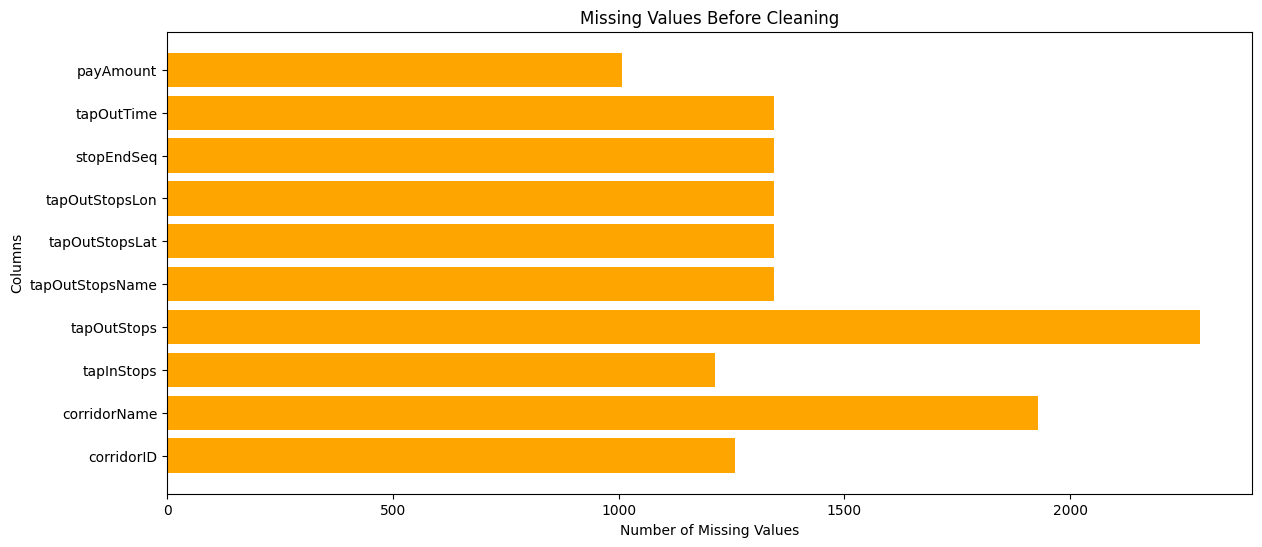

In [9]:
# Menghitung jumlah missing values di setiap kolom
missingValuesKotor = dataTransjakarta.isnull().sum()

# Memfilter hanya kolom yang memiliki missing values
missingValuesKotor = missingValuesKotor[missingValuesKotor > 0]

# Buat visualisasi untuk Missing Values sebelum dibersihkan
plt.figure(figsize=(14, 6))
plt.barh(missingValuesKotor.index, missingValuesKotor, color='orange')
plt.title('Missing Values Before Cleaning')
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.show()


<Axes: >

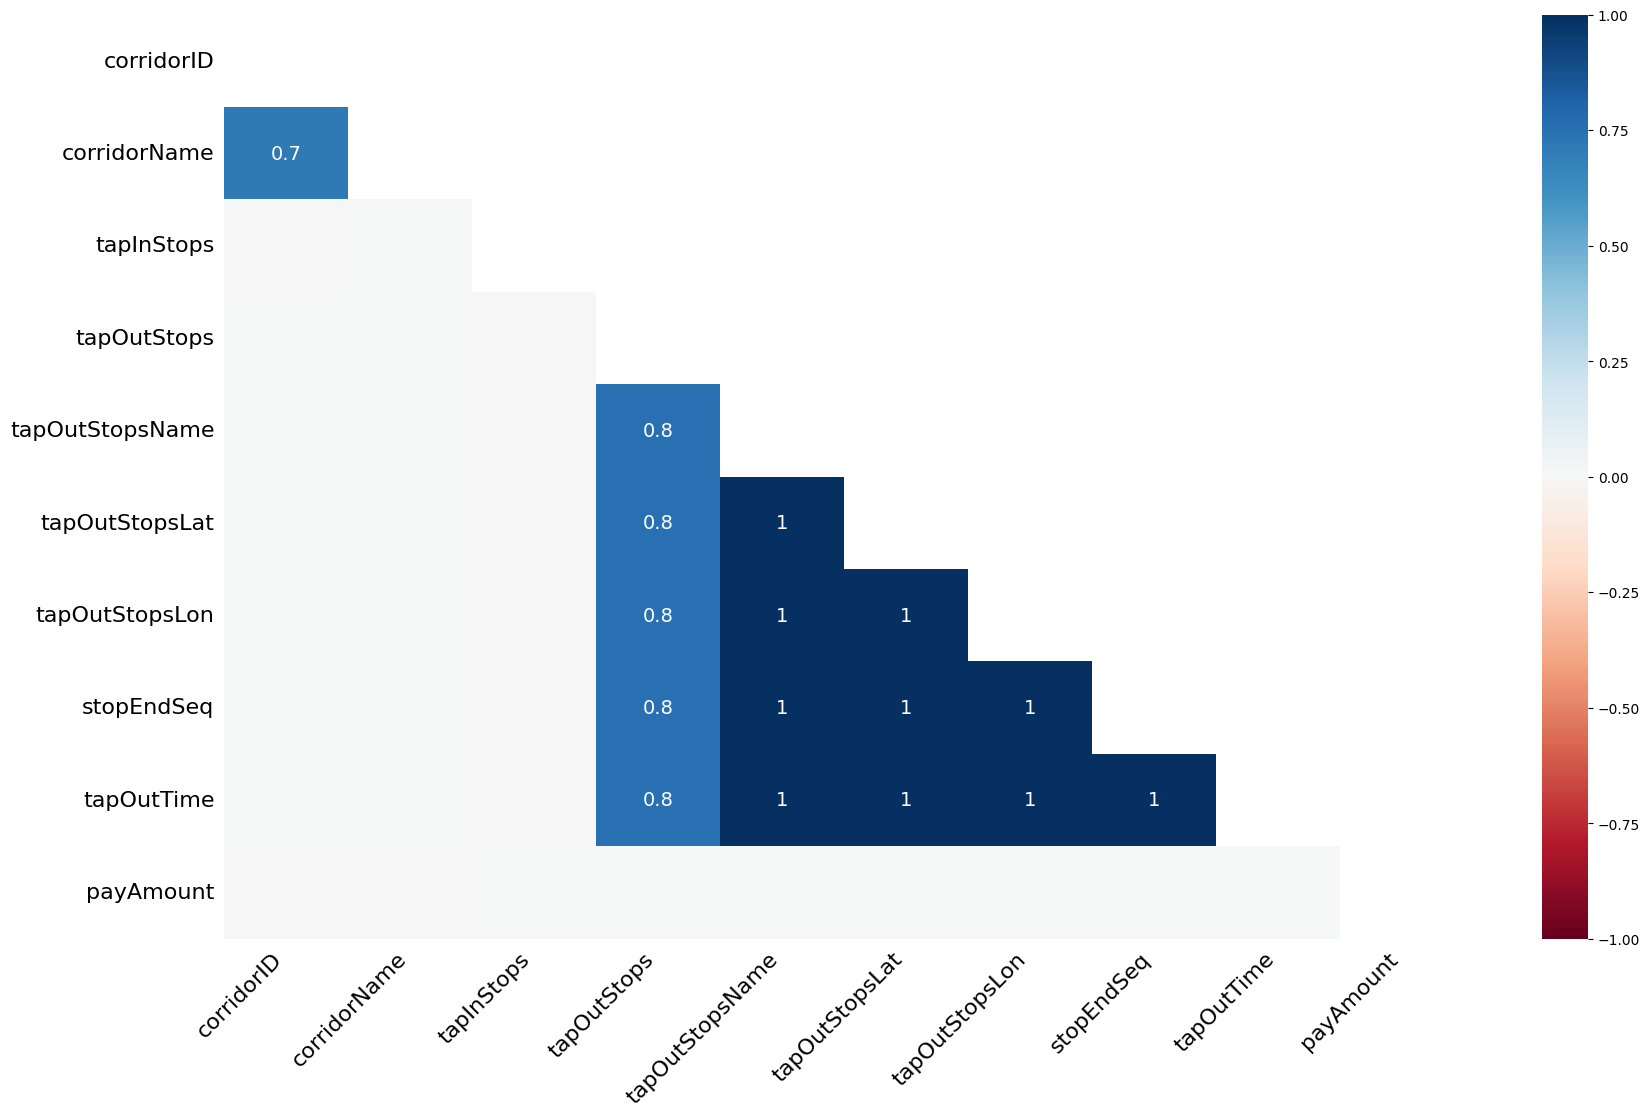

In [10]:
import missingno as msno

msno.heatmap(dataTransjakarta[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon',
'stopEndSeq', 'tapOutTime', 'payAmount']])


Berdasarkan visualisasi barchart dan heatmap dari missing values di atas, didapatkan informasi sebagai berikut.
1. Kolom ``tapOutTime``, `stopEndSeq`, `tapOutStopsLon`, `tapOutStopsLat`, dan `tapOutStopsName` memiliki proporsi jumlah missing value yang sama yaitu sebesar 1344.

2. Kolom `corridorID` dan `corridorName` memiliki nilai korelasi sebesar 0.7 yang menunjukkan adanya korelasi positif yang kuat antara missing value di dua kolom tersebut. Hal ini berarti, ketika satu kolom memiliki missing values maka kolom lain cenderung memiliki missing values. Selain itu, korelasi 0.7 ini menunjukkan adanya hubungan yang signifikan dan cenderung berulang antara kedua kolom tersebut. 

3. Dilihat dari bar chart, terdapat ketidaksesuaian jumlah missing values pada kolom `corridorID` dan `corridorName`.

4. Kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopLon`, `stopEndSeq`, dan `tapOutTime` memiliki nilai korelasi sebesar 0.8 yang menunjukkan adanya korelasi yang sangat kuat antar missing values. Artinya, jika terdapat missing value di salah satu kolom maka hampir selalu disertai dengan missing value di kolom lainnya. 

5. Dilihat dari heatmap, kolom `corridorName`, `tapInStops`, dan `payAmount` tidak menunjukkan adanya korelasi yang kuat dengan kolom lainnya, hal  ini dapat disebabkan beberapa persebaran missing value pada kolom ini tersebar secara acak dan independensi. 

Ada beberapa cara untuk menangani missing value:
1. Hapus baris atau kolom yang mengandung missing values. Tapi dalam kasus ini, cara ini tidak disarankan untuk digunakan, karena jumlah missing value termasuk cukup tinggi dengan presentasi hingga 38.06%
2. Isi nilai / data yang hilang. Cara ini dapat digunakan untuk menangani missing value. Hal ini dapat dilakukan dengan mengisi data yang hilang menggunakan niai sebenarnya  atau nilai yang dekat dengan nilai asli

Setelah mengetahui gambaran kasar anomali yang ada dalam dataset transjakarta, salin data original transjakarta. Hal ini bertujuan untuk menyimpan salinan baru dari data yang telah dibersihkan dan sebagai arsip jika stakeholder ingin melihatnya dan untuk keamanan data.

In [11]:
# Buat salinan data dari data original
dataTranjakartaBaru = dataTransjakarta.copy()

Lakukan data formatting pada kolom `tapInTime` dan `tapOutTime` dengan mengonversi tipe data object ke tipe data datetime. Selain itu, kolom `direction` juga memperjelas keterangan untuk mempermudah pemahaman dalam analisis data. 

In [12]:
# convert ke tipe data datetime
dataTranjakartaBaru['tapInTime'] = pd.to_datetime(dataTranjakartaBaru['tapInTime'])
dataTranjakartaBaru['tapOutTime'] = pd.to_datetime(dataTranjakartaBaru['tapOutTime'])

# Ubah keterangan pada kolom 'direction'
dataTranjakartaBaru['direction'] = dataTranjakartaBaru['direction'].replace({0: 'Arah Pergi', 1: 'Arah Datang'})

**PROSES DATA CLEANING**

`corridorID` dan `corridorName`

Karena berkorelasi kuat, gunakan data yang ada untuk mengisi missing value pada salah satu kolom berdasarkan kolom yang lain. Jika `corridorName` yang hilang, maka diisi dengan nilai yang sesuai dari `corridorID`, begitu sebaliknya.

In [13]:
# tampilkan jumlah missing value sebelum dibersihkan
dataTranjakartaBaru[['corridorID', 'corridorName']].isna().sum()


corridorID      1257
corridorName    1930
dtype: int64

In [14]:
# Buat pemetaan dari data yang tersedia untuk CorridorID dan CorridorName.
corridor_id_to_name = dataTranjakartaBaru.dropna(subset=['corridorID', 'corridorName']).drop_duplicates('corridorID').set_index('corridorID')['corridorName'].to_dict()
corridor_name_to_id = dataTranjakartaBaru.dropna(subset=['corridorID', 'corridorName']).drop_duplicates('corridorName').set_index('corridorName')['corridorID'].to_dict()

In [15]:
# Perbaiki case sensitive huruf nama kolom dan mencoba mengisi lagi
dataTranjakartaBaru['corridorName'] = dataTranjakartaBaru.apply(
    lambda row: corridor_id_to_name.get(row['corridorID'], row['corridorName']) 
    if pd.isna(row['corridorName']) else row['corridorName'],
    axis=1
)

# Verifikasi koreksi dan periksa nilai yang hilang untuk kolom-kolom ini setelah diisi
dataTranjakartaBaru[['corridorID', 'corridorName']].isna().sum()

corridorID      1257
corridorName    1125
dtype: int64

Terdapat perubahan jumlah missing value pada `corridorName` sebelum dan sesudah dilakukan cleaning data, yaitu dari 1930 menjadi 1125. Artinya, telah berkurang sekitar 805 missing value. Sedangankan pada `corridorID` tidak terdapat perubahan yaitu 1257. 

Data yang tidak terisi pada kedua kolom yang memuat missing value disebabkan karena beberapa `corridorID` tidak memiliki pasangan `corridorName` yang sesuai ataupun sebaliknya. 

Maka selanjutnya akan dilakukan pengisian missing value dengan keterangan 'Tidak Tersedia' ketika `corridorID` dan `corridorName` keduanya kosong.  

In [16]:
# Isi missing value di kolom 'corridorID' dan 'corridorName' dengan 'Tidak Tersedia' saat keduanya sama-sama kosong
mask = dataTranjakartaBaru['corridorID'].isna() & dataTranjakartaBaru['corridorName'].isna()
dataTranjakartaBaru.loc[mask, ['corridorID', 'corridorName']] = 'Tidak Tersedia'

# Verifikasi apakah pengisian berhasil dan periksa nilai yang masih hilang dalam kolom-kolom ini
dataTranjakartaBaru[['corridorID', 'corridorName']].isna().sum()


corridorID      132
corridorName      0
dtype: int64

Terdapat perubahan jumlah missing value pada `corridorName` sebelum dan sesudah dilakukan cleaning data 2, yaitu dari 1125 menjadi 0. Artinya, tidak ada lagi missing value. 

Pada `corridorID` juga terdapat perubahan jumlah missing value sebelum dan sesudah dilakukan cleaning data 2, yaitu dari 1257 menjadi 132. Artinya, telah berkurang sekitar 1125.

Karena memiliki korelasi yang kuat antara kolom `corridorID` dan `corridorName`, maka missing value pada kolom `corridorID` dapat diisi dengan duplikat keterangan dari kolom `corridorName`.

In [17]:
# Bangun kembali pemetaan dari corridorName ke corridorID menggunakan data lengkap yang ada.
updated_corridor_name_to_id = dataTranjakartaBaru.dropna(subset=['corridorID', 'corridorName']).drop_duplicates('corridorName').set_index('corridorName')['corridorID'].to_dict()

# Isi 'corridorID' yang hilang berdasarkan 'corridorName'
dataTranjakartaBaru['corridorID'] = dataTranjakartaBaru.apply(
    lambda row: updated_corridor_name_to_id.get(row['corridorName'], row['corridorID']) 
    if pd.isna(row['corridorID']) else row['corridorID'],
    axis=1
)

# Check kembali jumlah missing value, apakah berhasil atau tidak
dataTranjakartaBaru['corridorID'].isna().sum()

0

In [18]:
# tampilkan jumlah missing value setelah dibersihkan (diisi)
dataTranjakartaBaru[['corridorID', 'corridorName']].isna().sum()

corridorID      0
corridorName    0
dtype: int64

Missing Values pada kolom `corridorID` dan `corridorName` sudah 0. Selanjutnya melakukan pengisian missing value pada 5 kolom yang saling berkorelasi juga, yaitu kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime`

`tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime`

Pengisian missing value dilakukan dengan mencari data yang cocok dan menggunakan nilai dari data tersebut untuk mengisinya. Bisa diisi dengan asumsi 'missing value terjadi secara bersamaan di lima kolom ini'. Artinya, jika salah satu kolom hilang dalam suatu baris, maka semua kolom lain di baris yang sama mungkin akan hilang juga.

In [19]:
# tampilkan jumlah missing value sebelum dibersihkan
dataTranjakartaBaru[['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']].isna().sum()

tapOutStopsName    1344
tapOutStopsLat     1344
tapOutStopsLon     1344
stopEndSeq         1344
tapOutTime         1344
dtype: int64

In [20]:
# kelompokkan kelima kolom tersebut dalam satu variable agar efisien dalam code
kolomTapOut = ['tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime']

# Hapus baris yang memiliki nilai NaN pada kolomTapout dan disimpan di datatframe tapOut
tapOut = dataTranjakartaBaru.dropna(subset=kolomTapOut)

# Mendefinisikan fungsi untuk mengisi nilai yang hilang berdasarkan kasus lengkap yang tersedia
def fill_missing_tapout(row, reference_df, columns):
    if pd.isna(row['tapOutStops']):
        similar_rows = reference_df[reference_df['tapInStops'] == row['tapInStops']]
        if not similar_rows.empty:
            for col in columns:
                row[col] = similar_rows[col].iloc[0]
    return row

# Terapkan fungsi untuk mengisi nilai yang hilang
dataTranjakartaBaru = dataTranjakartaBaru.apply(fill_missing_tapout, axis=1, args=(tapOut, kolomTapOut))

# Check missing values yang tersisa untuk kolom tapOut setelah pengisian
dataTranjakartaBaru[kolomTapOut].isna().sum()

tapOutStopsName    70
tapOutStopsLat     70
tapOutStopsLon     70
stopEndSeq         70
tapOutTime         70
dtype: int64

Terdapat perubahan jumlah missing value untuk kelima kolom tersebut, dari 1344 menjadi 70. Artinya berkurang 1274 data dan dapat dikatakan cukup signifikan. Masih tersisa 70 missing value lagi, hal ini karena beberapa baris tidak memiliki informasi yang cukup lengkap untuk dilakukan cleaning otomatis seperti data tidak memiliki kemiripan pada data yang lengkap. 

Pengisian missing value selanjutnya menggunakan estimasi berdasarkan kolom lainnya menggunakan mean, modus, ataupun median dari nilai-nilai pada kolom yang sama. Pada kasus ini, pengisian missing value dengan median dan modus karena keduanya merupakan metode umum dalam mengisi missing value yang tidak tidak memiliki informasi yang cukup untuk estimasi lebih spesifik. 
- Median (Nilai tengah / Q2) : untuk kolom numerik seperti `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`
- Modus (Nilai yang paling sering muncul) : untuk kolom kategorikal seperti `tapOutStops`, `tapOutStopsName`, `tapOutTime`


In [21]:
# Isi dengan median untuk Kolom Numerik
kolomNumerik = ['tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq']
for col in kolomNumerik:
    medianValue = dataTranjakartaBaru[col].median()
    dataTranjakartaBaru[col].fillna(medianValue, inplace=True)

# Isi dengan median untuk Kolom Kategorikal
kolomKategorikal = ['tapOutStops', 'tapOutStopsName', 'tapOutTime']
for col in kolomKategorikal:
    modeValue = dataTranjakartaBaru[col].mode()[0]
    dataTranjakartaBaru[col].fillna(modeValue, inplace=True)

# Check missing values yang tersisa untuk kolom tapOut setelah pengisian
dataTranjakartaBaru[kolomTapOut].isna().sum()

tapOutStopsName    0
tapOutStopsLat     0
tapOutStopsLon     0
stopEndSeq         0
tapOutTime         0
dtype: int64

Missing Value pada kolom `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` sudah 0. Selanjutnya cek missing value secara keseluruhan kolom pada dataset transjakarta setelah dilakukan cleaning data.  

In [22]:
# Check missing value keseluruhan data
dataTranjakartaBaru.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount           1007
dtype: int64

Informasi yang didapatkan dari output di atas yaitu, missing value pada `corridorID`, `corridorName` `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, dan `tapOutTime` telah terisi dan tersisa kolom `tapInStops` dan `payAmount` yang masih terdapat missing value.


`tapInStops`

Missing value pada kolom tapInStops sebesar 1213. Untuk pengisian missing value, dapat menggunakan informasi kolom lain yaitu tapInStopsName, tapInStopsLat, ataupun tapInStopsLon yang berkorelasi secara langsung.

Contoh, jika sebuah baris memiliki longitude dan latittue yang sangat dekat dengan halte terdaftar, maka dapat diasumsikan halte terdekat sebagai tapInStops.

In [23]:
# Buat mapping dari kombinasi 'tapInStopsName', 'tapInStopsLat', dan 'tapInStopsLon' ke 'tapInStops'
tapInStopMap = dataTranjakartaBaru.dropna(subset=['tapInStops']).drop_duplicates(
    subset=['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon']).set_index(
    ['tapInStopsName', 'tapInStopsLat', 'tapInStopsLon'])['tapInStops'].to_dict()

# Function to fill missing 'tapInStops' based on the mapping
def fill_tap_in_stops(row):
    if pd.isna(row['tapInStops']):
        return tapInStopMap.get((row['tapInStopsName'], row['tapInStopsLat'], row['tapInStopsLon']))
    return row['tapInStops']

# Terapkan fungsi untuk mengisi nilai yang hilang 'tapInStops'
dataTranjakartaBaru['tapInStops'] = dataTranjakartaBaru.apply(fill_tap_in_stops, axis=1)

# Check missing values yang tersisa untuk kolom tapInStops setelah pengisian
dataTranjakartaBaru['tapInStops'].isna().sum()

34

Terjadi perubahan missing value setelah dilakukan pengisian data, yaitu dari 1213 menjadi 34 missing value. Hal ini menunjukkan cukup efektifnya pendekatan yang digunakan untuk sebagian besar data. Akan tetapi masih tersisa 34 missing value yang belum terisi dan dapat dipertimbangkan menggunakan estimasi jarak tempuh perjalanan yang paling sesuai dengan melihat tapOutStops nya.

Pengisian sisa missing value `tapInStops` menggunakan estimasi jarak terdekat dengan `tapOutStops` dengna mencari halte yang memiliki jarak geografis terdekat ke `tapOutStops`. Langkah ini memanfaatkan informasi longitude dan latitude untuk mengisi jarak dan memilih halte masuk yang paling logis berdasarkan kedekatan fisik. 

In [24]:
# digunakan untuk menghitung jarak antara dua set titik dalam ruang n-dimensi.
from scipy.spatial.distance import cdist

# Extract known stops with coordinates
## Hapus baris yang memilki nilai NaN
known_stops = dataTranjakartaBaru.dropna(subset=['tapInStops', 'tapInStopsLat', 'tapInStopsLon'])
## Hapus duplikat untuk memastikan setiap baris unik
koordinat = known_stops[['tapInStops', 'tapInStopsLat', 'tapInStopsLon']].drop_duplicates()

# For missing 'tapInStops', calculate the closest stop based on 'tapOutStopsLat' and 'tapOutStopsLon'
def find_closest_stop(row):
    if pd.isna(row['tapInStops']):
        # Calculate distances to all known stops
        distances = cdist([(row['tapOutStopsLat'], row['tapOutStopsLon'])],
                          koordinat[['tapInStopsLat', 'tapInStopsLon']],
                          metric='euclidean')
        # Find the index of the minimum distance
        min_index = distances.argmin()
        return koordinat.iloc[min_index]['tapInStops']
    return row['tapInStops']

# Terapkan fungsi untuk mengisi nilai yang hilang 'tapInStops'
dataTranjakartaBaru['tapInStops'] = dataTranjakartaBaru.apply(find_closest_stop, axis=1)

# Check missing values yang tersisa untuk kolom tapInStops setelah pengisian
dataTranjakartaBaru['tapInStops'].isna().sum()


0

In [25]:
dataTranjakartaBaru.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq             0
tapOutTime             0
payAmount           1007
dtype: int64

Missing value pada kolom `tapInStops` telah berhasil diisi. Selanjunya, kolom yang masih ada Missing value yaitu `payAmount`.

`payAmount`

Pengisian mising value di kolom `payAmount` mdengan nilai median. Hal ini karena kolom ini terdapat outlier yang dapat mempengaruhi rata-rata.

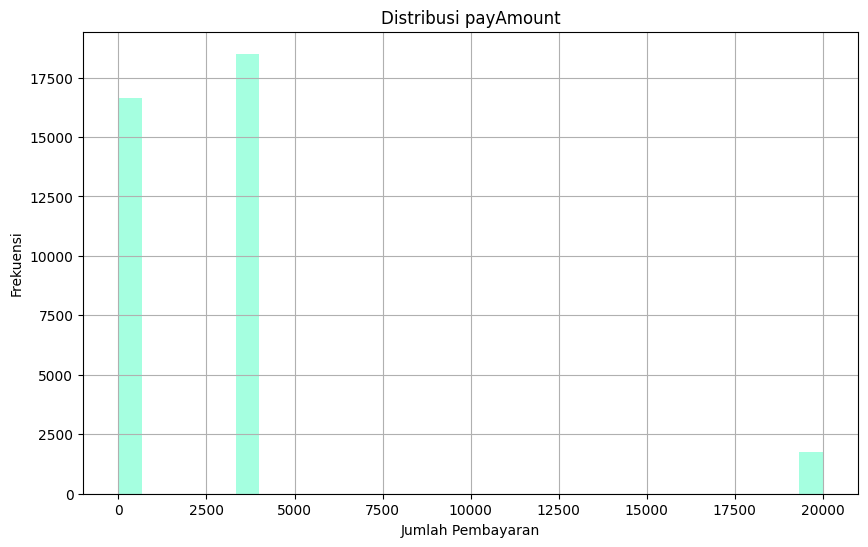

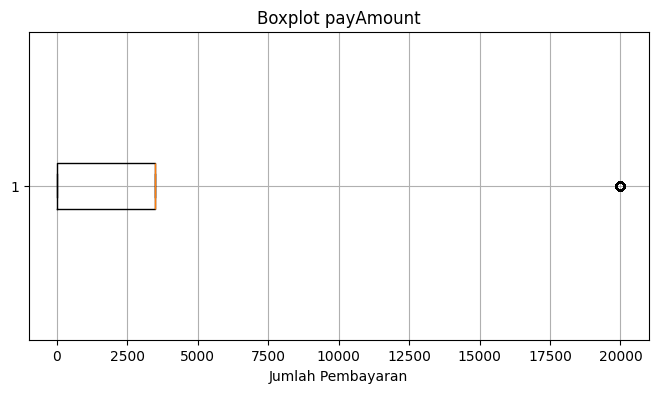

In [26]:
# check oulier pada `payAmount` menggunakan boxplot. 
# Membuat histogram untuk visualisasi distribusi 'payAmount'
plt.figure(figsize=(10, 6))
plt.hist(dataTranjakartaBaru['payAmount'], bins=30, color='#7FFFD4', alpha=0.7)
plt.title('Distribusi payAmount')
plt.xlabel('Jumlah Pembayaran')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Membuat boxplot untuk 'payAmount'
plt.figure(figsize=(8, 4))
plt.boxplot(dataTranjakartaBaru['payAmount'].dropna(), vert=False)  # Menghilangkan nilai null untuk visualisasi
plt.title('Boxplot payAmount')
plt.xlabel('Jumlah Pembayaran')
plt.grid(True)
plt.show()

In [27]:
# Isi Missing Value 'payAmount' menggunakan median
payAmountMedian = dataTranjakartaBaru['payAmount'].median()
dataTranjakartaBaru['payAmount'].fillna(payAmountMedian, inplace=True)

# Check perubahan
dataTranjakartaBaru.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

Misisng Value pada kolom `payAmount` telah berhasil diisi sehingga sudah tidak ada missing value lagi untuk seluruh kolom yang ada dalam dataset. 

In [28]:
# Check perubahan secara keseluruhan
dataTranjakartaBaru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        37900 non-null  object        
 7   corridorName      37900 non-null  object        
 8   direction         37900 non-null  object        
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

Hal yang didapatkan dari output di atas yaitu:
- Sudah tidak ada missing value untuk semua kolom pada dataset transjakarta
- Tipe data pada `tapInTime` dan `tapOutTime` telah diubah dari tipe data object menjadi tipe data datetime.

Selanjutnya simpan data yang telah dibersihkan ke file baru CSV

In [29]:
# Simpan data yang telah dibersihkan ke file baru CSV ke variabel baru
dataTJBaru = dataTranjakartaBaru.copy()

# convert dan simpan ke data original ke CSV
dataTransjakarta.to_csv('data_original_transjakarta.csv', index=False)

# convert dan simpan data yang telah dibersihkan ke CSV
dataTJBaru.to_csv('data_terbaru_transjakarta.csv', index=False)

# cek informasi statistik data terbaru
print(dataTJBaru.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transID           37900 non-null  object        
 1   payCardID         37900 non-null  int64         
 2   payCardBank       37900 non-null  object        
 3   payCardName       37900 non-null  object        
 4   payCardSex        37900 non-null  object        
 5   payCardBirthDate  37900 non-null  int64         
 6   corridorID        37900 non-null  object        
 7   corridorName      37900 non-null  object        
 8   direction         37900 non-null  object        
 9   tapInStops        37900 non-null  object        
 10  tapInStopsName    37900 non-null  object        
 11  tapInStopsLat     37900 non-null  float64       
 12  tapInStopsLon     37900 non-null  float64       
 13  stopStartSeq      37900 non-null  int64         
 14  tapInTime         3790

## **3. Data Analysis & Visualisasi**
Tahap ini akan menjawab pernyataan masalah yang telah ditentukan di awal dengan melakukan analisis data dan menampilkan visualisasinya. Tahap ini juga akan dibuat sub-pertanyaan dari setiap pernyataan masalah yang bertujuan untuk membantu menjawab dari pernyataan masalahnya.

Pernyataan masalah 1: Menganalisa efisiensi rute dan penggunaan sumber daya
sub pertanyaan:
1. Apa rute yang paling sering digunakan oleh penumpang?
2. Apa rute dengan waktu perjalanan rata-rata terlama?
3. Apa rute yang paling banyak digunakan pada jam sibuk?
4. Apakah ada korelasi antara jumlah penumpang dan jumlah halte yang dilalui pada suatu rute?
5. Bagaimana distribusi penggunaan halte (tap in dan tap out) pada berbagai rute?

Pernyataan masalah 2: Menganalisa pengelolaan penumpang selama jam sibuk (rush hour)
Sub Pertanyaan:
1. Jam berapa saja yang dianggap sebagai jam sibuk?
2. Berapa banyak penumpang yang menggunakan Transjakarta selama jam sibuk dibandingkan dengan jam non-sibuk?
3. Apa rute yang paling padat selama jam sibuk?
4. Bagaimana distribusi gender dan usia penumpang selama jam sibuk?
5. Apakah ada pola spesifik dalam penggunaan Transjakarta selama hari kerja dibandingkan dengan akhir pekan?
6. Apakah ada perbedaan dalam waktu perjalanan selama jam sibuk dibandingkan dengan jam non-sibuk?

In [30]:
# Menambah beberapa kolom baru yang akan digunakan dalam analisis data 
## Tambah kolom Durasi Perjalanan
dataTJBaru['tripDuration'] = (dataTJBaru['tapOutTime'] - dataTJBaru['tapInTime']).dt.total_seconds() / 60

## Tambah kolom Jam untuk tap In
dataTJBaru['hour'] = dataTJBaru['tapInTime'].dt.hour

## Tambah kolom hari dalam seminggu
dataTJBaru['dayOfWeek'] = dataTJBaru['tapInTime'].dt.dayofweek

## Tambah kolom Usia
dataTJBaru['payCardBirthDate'] = pd.to_datetime(df['payCardBirthDate'], format='%Y')
dataTJBaru['age'] = 2024 - dataTJBaru['payCardBirthDate'].dt.year

dataTJBaru.head(2)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tripDuration,hour,dayOfWeek,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008-01-01,5,Matraman Baru - Ancol,Arah Datang,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,39.150000,5,0,16
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997-01-01,6C,Stasiun Tebet - Karet via Patra Kuningan,Arah Pergi,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,57.283333,5,0,27


In [54]:
# Simpan file csv terbaru 
dataTJFinal = dataTJBaru.copy()

# Simpan data dengan tambahan kolom terbaru
dataTJFinal.to_csv('data_final_transjakarta.csv', index=False)
dataTJFinal.to_excel('data_final_transjakarta.xlsx', index=False)


# Menampilkan informasi dari data yang telah dibersihkan
info_df = pd.DataFrame(dataTJFinal.dtypes, columns=['Dtype'])
info_df['Non-Null Count'] = dataTJFinal.notnull().sum()
info_df['Null Count'] = dataTJFinal.isnull().sum()

# Menampilkan statistik deskriptif dari data yang telah dibersihkan
stats_df = dataTJFinal.describe().transpose()

# Menampilkan informasi dataframe
print("Information of Dataframe:")
print(info_df)

# Menampilkan statistik deskriptif
print("\nStatistical Description of Dataframe:")
stats_df

Information of Dataframe:
                           Dtype  Non-Null Count  Null Count
transID                   object           37900           0
payCardID                  int64           37900           0
payCardBank               object           37900           0
payCardName               object           37900           0
payCardSex                object           37900           0
payCardBirthDate  datetime64[ns]           37900           0
corridorID                object           37900           0
corridorName              object           37900           0
direction                 object           37900           0
tapInStops                object           37900           0
tapInStopsName            object           37900           0
tapInStopsLat            float64           37900           0
tapInStopsLon            float64           37900           0
stopStartSeq               int64           37900           0
tapInTime         datetime64[ns]           37900           

,count,mean,min,25%,50%,75%,max,std
payCardID,37900.0,425006029854231744.0,60403675436.0,180044239953466.0,3507946556271373.0,4699023220672919.0,4997693930906134528.0,1321698663895501824.0
payCardBirthDate,37900,1990-02-02 11:53:09.656992,1946-01-01 00:00:00,1982-01-01 00:00:00,1990-01-01 00:00:00,2001-01-01 00:00:00,2012-01-01 00:00:00,NaN
tapInStopsLat,37900.0,-6.214838,-6.394973,-6.245863,-6.214587,-6.175528,-6.089429,0.057911
tapInStopsLon,37900.0,106.841554,106.61473,106.80347,106.83483,106.88227,107.02395,0.060369
stopStartSeq,37900.0,13.57248,0.0,4.0,10.0,19.0,68.0,12.237623
tapInTime,37900,2023-04-16 08:05:29.462770688,2023-04-01 06:22:27,2023-04-10 09:02:15,2023-04-16 17:38:42.500000,2023-04-22 05:12:02.500000,2023-04-30 21:55:41,NaN
tapOutStopsLat,37900.0,-6.214659,-6.394973,-6.247225,-6.214787,-6.174861,-6.091746,0.059041
tapOutStopsLon,37900.0,106.841192,106.61473,106.80187,106.83445,106.88288,107.02366,0.060894
stopEndSeq,37900.0,21.207098,1.0,11.0,18.0,29.0,77.0,13.801401
tapOutTime,37900,2023-04-15 16:20:14.979208448,2023-04-01 07:27:31,2023-04-07 21:13:04.500000,2023-04-15 10:49:00,2023-04-21 18:39:59.500000,2023-04-30 23:23:18,NaN


**Pernyataan masalah 1: Menganalisa efisiensi rute dan penggunaan sumber daya**

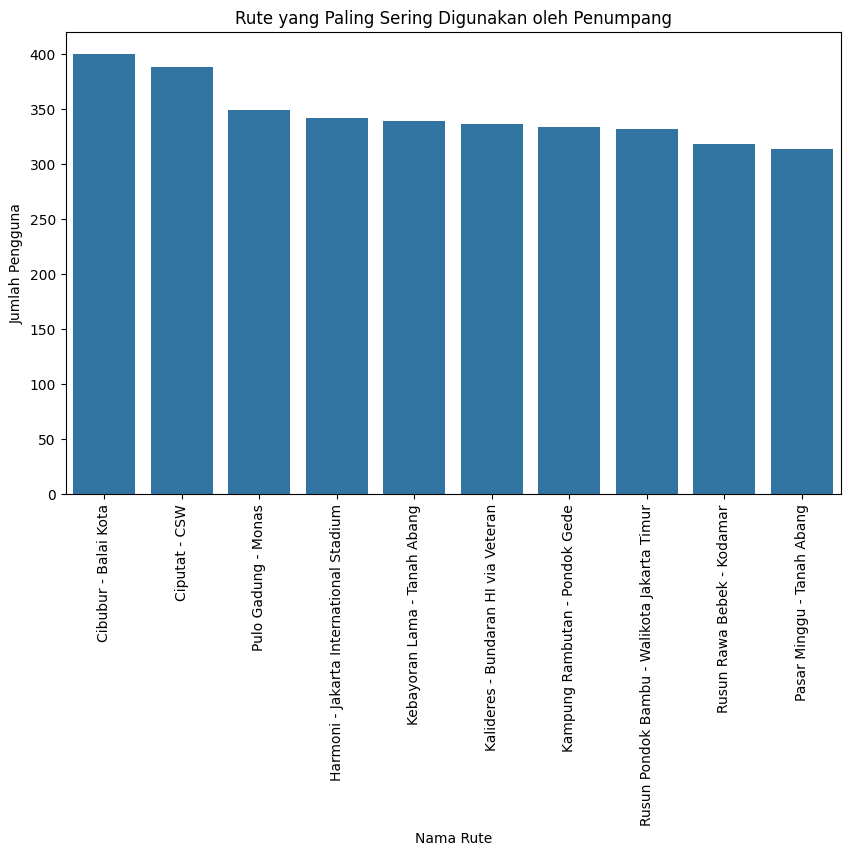

In [32]:
# Sub Pertanyaan 1: Apa rute yang paling sering digunakan oleh penumpang?
# Menghilangkan rute 'tidak tersedia' dari data
dataTJBaru_filtered = dataTJBaru[dataTJBaru['corridorName'] != 'Tidak Tersedia']
ruteTersering = dataTJBaru_filtered['corridorName'].value_counts().head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=ruteTersering.index, y=ruteTersering.values)
plt.xticks(rotation=90)
plt.title('Rute yang Paling Sering Digunakan oleh Penumpang')
plt.xlabel('Nama Rute')
plt.ylabel('Jumlah Pengguna')
plt.show()

In [33]:
ruteTersering

corridorName
Cibubur - Balai Kota                           400
Ciputat - CSW                                  388
Pulo Gadung - Monas                            349
Harmoni - Jakarta International Stadium        342
Kebayoran Lama - Tanah Abang                   339
Kalideres - Bundaran HI via Veteran            336
Kampung Rambutan - Pondok Gede                 333
Rusun Pondok Bambu - Walikota Jakarta Timur    332
Rusun Rawa Bebek - Kodamar                     318
Pasar Minggu - Tanah Abang                     313
Name: count, dtype: int64

**Insight**

Rute paling sering digunakan oleh penumpang yaitu rute Cibubur - Balai Kota dengan jumlah penumpang 400 orang.

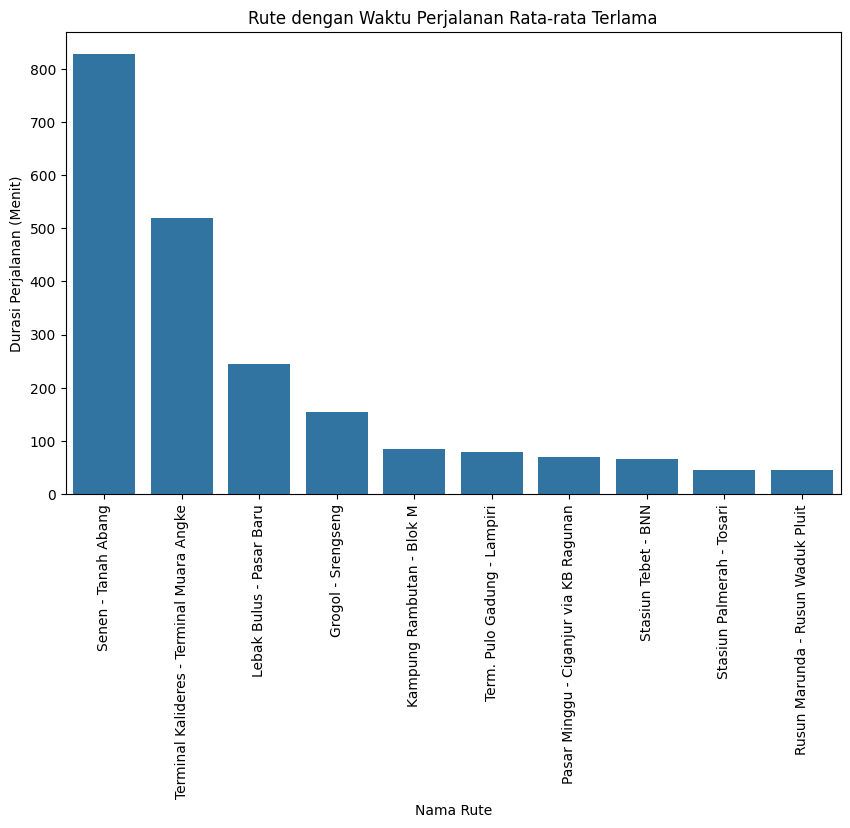

In [34]:
# Sub Pertanyaan 2: Apa rute dengan waktu perjalanan rata-rata terlama?
avg_trip_duration = dataTJBaru.groupby('corridorName')['tripDuration'].mean().sort_values(ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_trip_duration.index, y=avg_trip_duration.values)
plt.xticks(rotation=90)
plt.title('Rute dengan Waktu Perjalanan Rata-rata Terlama')
plt.xlabel('Nama Rute')
plt.ylabel('Durasi Perjalanan (Menit)')
plt.show()

In [35]:
avg_trip_duration

corridorName
Senen - Tanah Abang                          828.425610
Terminal Kalideres - Terminal Muara Angke    518.849020
Lebak Bulus - Pasar Baru                     244.111972
Grogol - Srengseng                           154.221159
Kampung Rambutan - Blok M                     84.985294
Term. Pulo Gadung - Lampiri                   78.501613
Pasar Minggu - Ciganjur via KB Ragunan        69.994444
Stasiun Tebet - BNN                           65.197661
Stasiun Palmerah - Tosari                     45.283562
Rusun Marunda - Rusun Waduk Pluit             44.784848
Name: tripDuration, dtype: float64

**Insight**

Rute dengan waktu perjalanan rata-rata terlama yaitu rute Senen - Tanah Abang dengan rata-rata durasi perjalanan 828.43 menit.

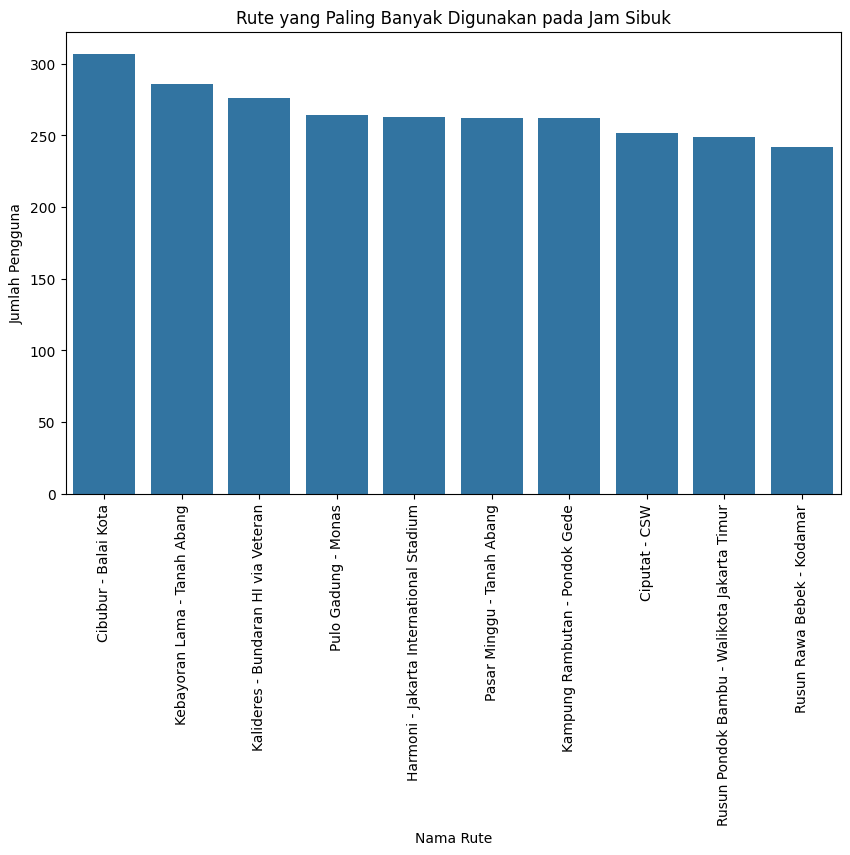

In [36]:
# Sub Pertanyaan 3: Apa rute yang paling banyak digunakan pada jam sibuk?
rush_hours = dataTJBaru[(dataTJBaru['hour'] >= 5) & (dataTJBaru['hour'] <= 8) | (dataTJBaru['hour'] >= 16) & (dataTJBaru['hour'] <= 19)]

rush_hours1 = dataTJBaru_filtered[(dataTJBaru_filtered['hour'] >= 5) & (dataTJBaru_filtered['hour'] <= 8) | (dataTJBaru_filtered['hour'] >= 16) & (dataTJBaru_filtered['hour'] <= 19)]
rush_route_usage = rush_hours1['corridorName'].value_counts().head(10) # teratas

# Visualisasi 
plt.figure(figsize=(10, 6))
sns.barplot(x=rush_route_usage.index, y=rush_route_usage.values)
plt.xticks(rotation=90)
plt.title('Rute yang Paling Banyak Digunakan pada Jam Sibuk')
plt.xlabel('Nama Rute')
plt.ylabel('Jumlah Pengguna')
plt.show()

In [37]:
rush_route_usage

corridorName
Cibubur - Balai Kota                           307
Kebayoran Lama - Tanah Abang                   286
Kalideres - Bundaran HI via Veteran            276
Pulo Gadung - Monas                            264
Harmoni - Jakarta International Stadium        263
Pasar Minggu - Tanah Abang                     262
Kampung Rambutan - Pondok Gede                 262
Ciputat - CSW                                  252
Rusun Pondok Bambu - Walikota Jakarta Timur    249
Rusun Rawa Bebek - Kodamar                     242
Name: count, dtype: int64

**Insight** 

Rute yang paling banyak digunakan pada jam sibuk (05.00 - 08.00 & 16.00 - 19.00) yaitu rute Cibubur - Balai Kota dengan jumlah pengguna sebesar 307 orang.

In [38]:
# Sub Pertanyaan 4: Apakah ada korelasi antara jumlah penumpang dan jumlah halte yang dilalui pada suatu rute?
route_stop_count = dataTJBaru.groupby('corridorName')['stopEndSeq'].max() - dataTJBaru.groupby('corridorName')['stopStartSeq'].min() + 1
route_passenger_count = dataTJBaru['corridorName'].value_counts()
corr = route_stop_count.corr(route_passenger_count)
print(f'Korelasi antara jumlah penumpang dan jumlah halte yang dilalui: {corr *100:.2f}%')


Korelasi antara jumlah penumpang dan jumlah halte yang dilalui: 15.65%


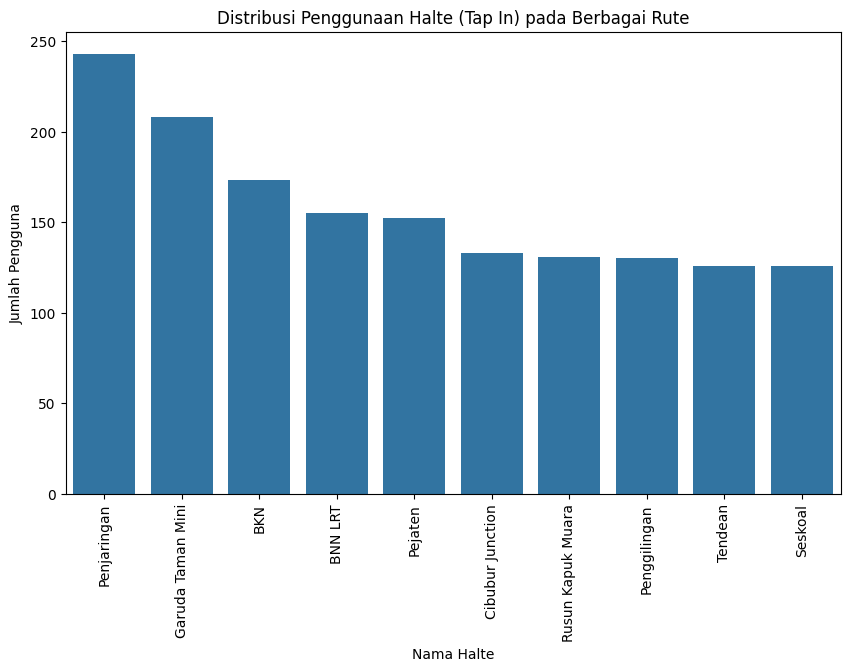

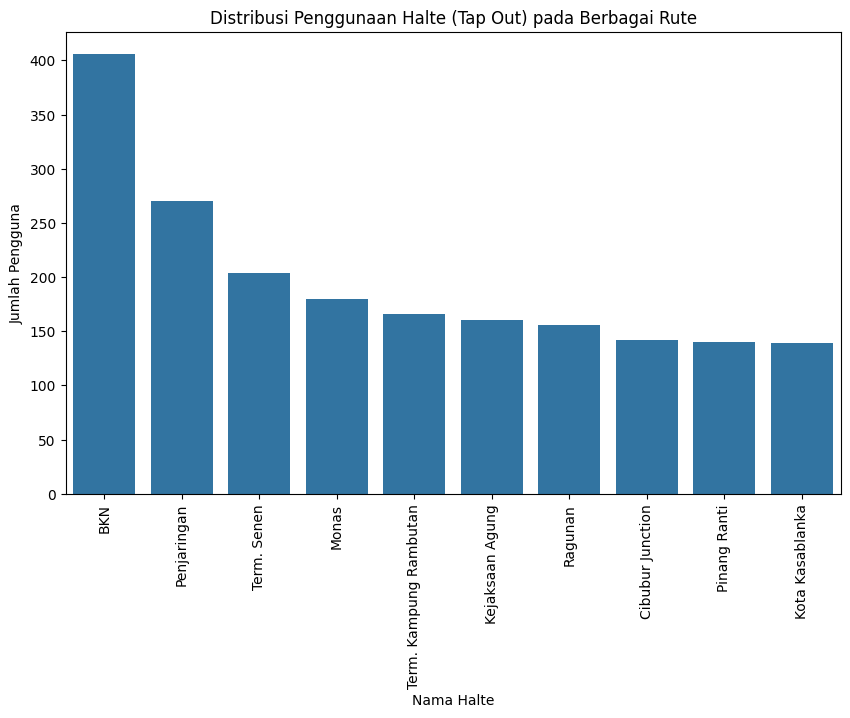

In [39]:
# Sub Pertanyaan 5: Bagaimana distribusi penggunaan halte (tap in dan tap out) pada berbagai rute?
tap_in_usage = dataTJBaru['tapInStopsName'].value_counts().head(10)
tap_out_usage = dataTJBaru['tapOutStopsName'].value_counts().head(10)

# Visualisasi Tap In
plt.figure(figsize=(10, 6))
sns.barplot(x=tap_in_usage.index, y=tap_in_usage.values)
plt.xticks(rotation=90)
plt.title('Distribusi Penggunaan Halte (Tap In) pada Berbagai Rute')
plt.xlabel('Nama Halte')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Visualisasi Tap Out
plt.figure(figsize=(10, 6))
sns.barplot(x=tap_out_usage.index, y=tap_out_usage.values)
plt.xticks(rotation=90)
plt.title('Distribusi Penggunaan Halte (Tap Out) pada Berbagai Rute')
plt.xlabel('Nama Halte')
plt.ylabel('Jumlah Pengguna')
plt.show()

In [40]:
tap_in_usage

tapInStopsName
Penjaringan          243
Garuda Taman Mini    208
BKN                  173
BNN LRT              155
Pejaten              152
Cibubur Junction     133
Rusun Kapuk Muara    131
Penggilingan         130
Tendean              126
Seskoal              126
Name: count, dtype: int64

In [41]:
tap_out_usage

tapOutStopsName
BKN                       406
Penjaringan               270
Term. Senen               204
Monas                     180
Term. Kampung Rambutan    166
Kejaksaan Agung           160
Ragunan                   156
Cibubur Junction          142
Pinang Ranti              140
Kota Kasablanka           139
Name: count, dtype: int64

**Insight**

Distribusi penggunaan halte (tap in dan tap out) pada berbagai rute sebagai berikut.
- penggunaan halte (tap in) distribusi jumlah penumpang terbanyak ada di halte Penjaringan sebanyak 243 orang.
- penggunaan halte (tap out) distribusi jumlah penumpang terbanyak ada di halte BKN sebanyak 406 orang.

**Pernyataan masalah 2: Menganalisa pengelolaan penumpang selama jam sibuk (rush hour)**

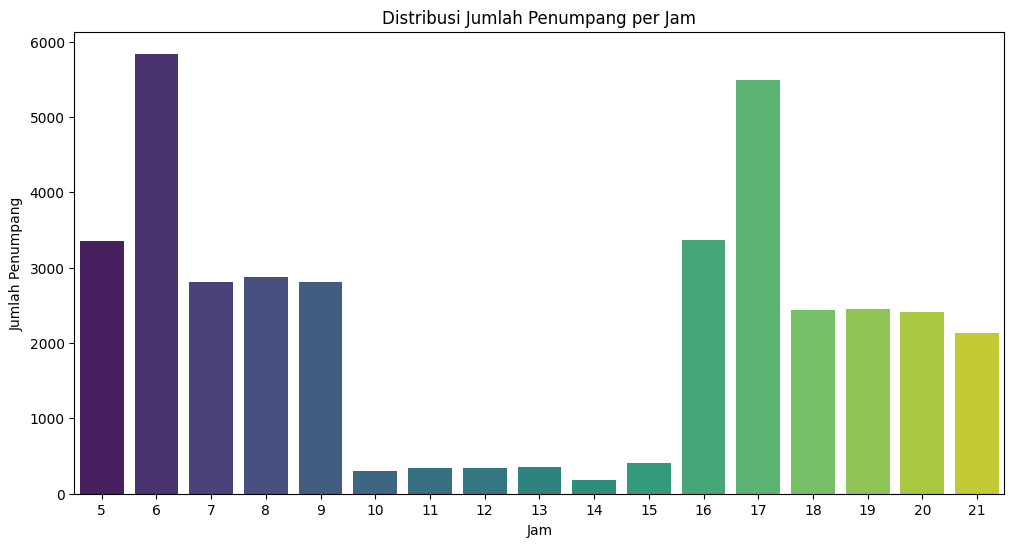

In [42]:
# Sub Pertanyaan 1: Jam berapa saja yang dianggap sebagai jam sibuk?
# Menghitung jumlah penumpang per jam
hourly_counts = dataTJBaru['tapInTime'].dt.hour.value_counts().sort_index()

# Visualisasi distribusi penumpang per jam
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Distribusi Jumlah Penumpang per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.show()

In [43]:
# Definisi jam sibuk: 05:00 - 08:00 dan 16:00 - 19:00
rush_hours = dataTJBaru[(dataTJBaru['hour'] >= 5) & (dataTJBaru['hour'] <= 8) | (dataTJBaru['hour'] >= 16) & (dataTJBaru['hour'] <= 19)]


**Insight**

Dari barchart di atas, didapatkan jam yang dianggap jam sibuk mulai pukul 05.00 hingga 08.00 dan dimulai lagi pukul 16.00 hingga 19.00

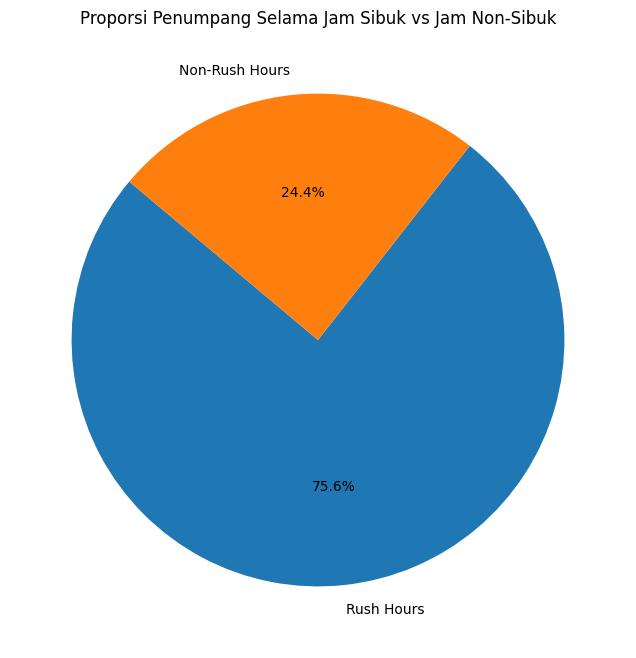

In [44]:
# Sub Pertanyaan 2: Berapa banyak penumpang yang menggunakan Transjakarta selama jam sibuk dibandingkan dengan jam non-sibuk?
rush_count = rush_hours.shape[0]
non_rush_count = dataTJBaru.shape[0] - rush_count
labels = ['Rush Hours', 'Non-Rush Hours']
sizes = [rush_count, non_rush_count]

# Visualisasi
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Penumpang Selama Jam Sibuk vs Jam Non-Sibuk')
plt.show()

In [45]:
# Membuat tabel
rush_data = pd.DataFrame({
    'Kategori': ['Rush Hours', 'Non-Rush Hours'],
    'Jumlah Penumpang': [rush_count, non_rush_count]
})
print(rush_data)

         Kategori  Jumlah Penumpang
0      Rush Hours             28635
1  Non-Rush Hours              9265


**Insight**

- Penumpang yang menggunakan transjakarta selama jam sibuk lebih banyak dibanding selama jam tidak sibuk. 
- Presentase jumlah penumpang di jam sibuk sebesar 75.6% dan presentase jumlah penumpang di jam tidak sibuk sebesar 24.4%
- Jumlah penumpang di jam sibuk (rush hour) sebanyak 28635 dan di jam tidak sibuk (Non-Rush Hours) sebanyak 9265

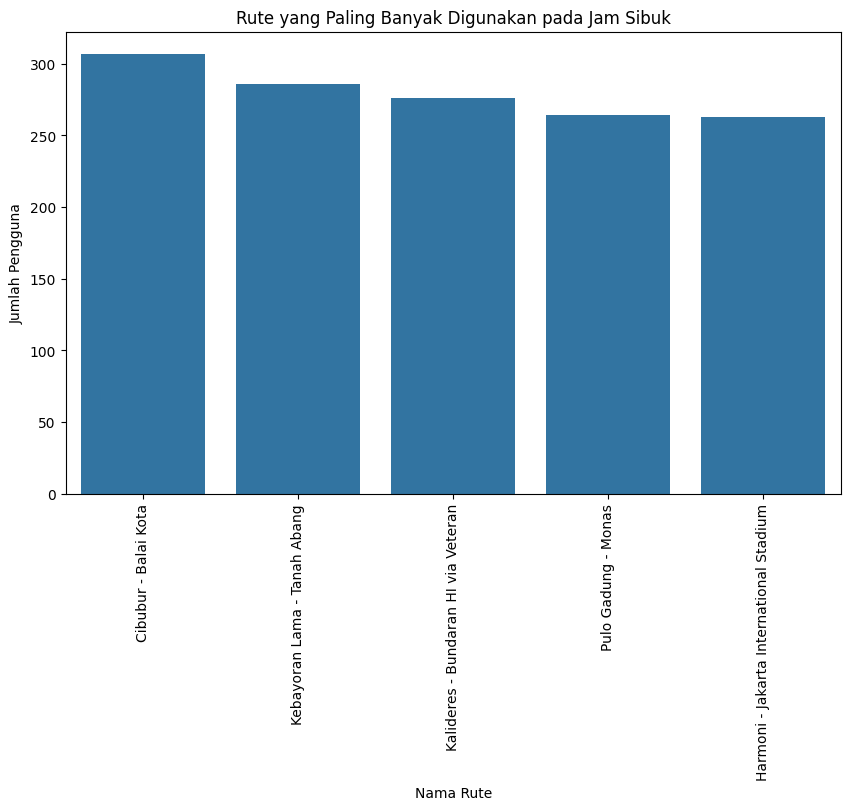

In [46]:
# Sub Pertanyaan 3: Apa rute yang paling padat selama jam sibuk?
rush_route_usage = rush_hours1['corridorName'].value_counts().head()

# visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=rush_route_usage.index, y=rush_route_usage.values)
plt.xticks(rotation=90)
plt.title('Rute yang Paling Banyak Digunakan pada Jam Sibuk')
plt.xlabel('Nama Rute')
plt.ylabel('Jumlah Pengguna')
plt.show()

In [47]:
rush_route_usage

corridorName
Cibubur - Balai Kota                       307
Kebayoran Lama - Tanah Abang               286
Kalideres - Bundaran HI via Veteran        276
Pulo Gadung - Monas                        264
Harmoni - Jakarta International Stadium    263
Name: count, dtype: int64

**Insight**

Rute yang paling padat selama jam sibuk yaitu rute Cibubur - Balai Kota dengan jumlah pengguna sebesar 307 orang.

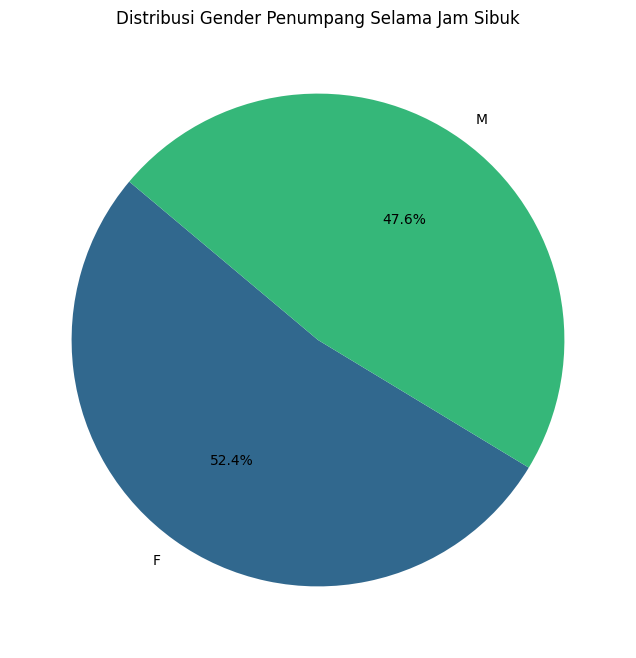

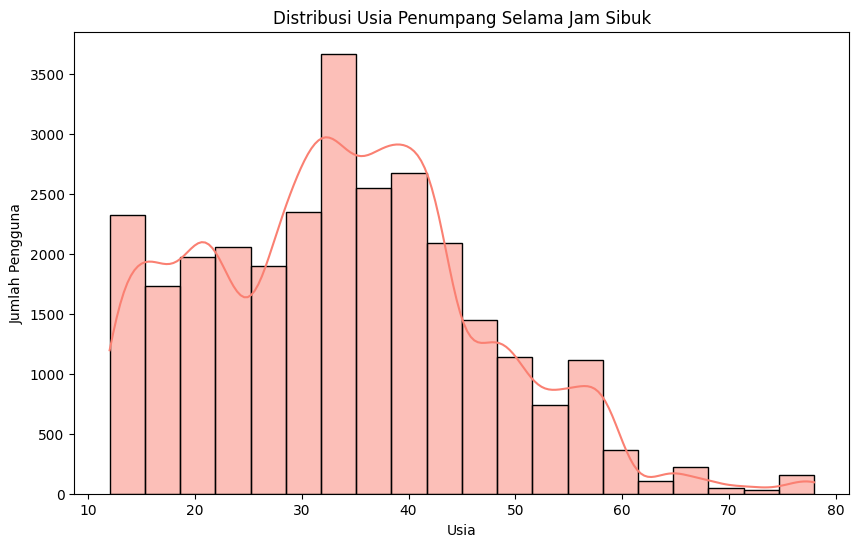

In [48]:
# Sub Pertanyaan 4: Bagaimana distribusi gender dan usia penumpang selama jam sibuk?

## Menghitung distribusi gender selama jam sibuk
gender_distribution = rush_hours['payCardSex'].value_counts()
## Visualisasi Gender 
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(gender_distribution)))
plt.title('Distribusi Gender Penumpang Selama Jam Sibuk')
plt.show()

## visualisasi usia
plt.figure(figsize=(10, 6))
sns.histplot(rush_hours['age'], bins=20, kde=True, color='salmon')
plt.title('Distribusi Usia Penumpang Selama Jam Sibuk')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pengguna')
plt.show()

In [49]:
gender_distribution

payCardSex
F    15018
M    13617
Name: count, dtype: int64

**Insight**

- Jumlah penumpang perempuan dan laki-laki berbeda, yaitu perempuan sebanyak 15018 atau sebesar 52.4% dan laki-laki sebanyak 13617 sebesar 47.6%.
- Hal ini dapat menjadi indikasi dalam peninjauan kembali terhadap layanan yang lebih menarik atau sesuai untuk salah satu gender. 
- Distribusi usia, histogram menunjukkan puncak pada kelompok usia 30-40 tahu, hal ini menunjukkan bahwa mayoritas penumpang selama jam sibuk berasal dari kelompok usia tersebut.

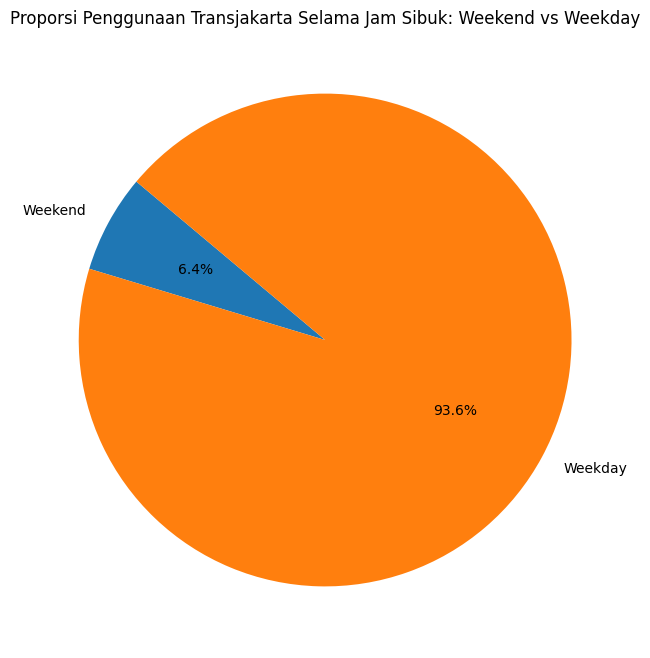

In [50]:
# Sub Pertanyaan 5: Apakah ada pola spesifik dalam penggunaan Transjakarta selama hari kerja dibandingkan dengan akhir pekan?
## Menambahkan kolom untuk mengecek apakah weekend atau weekday
rush_hours['isWeekend'] = rush_hours['dayOfWeek'] >= 5

## Menghitung jumlah penumpang selama jam sibuk pada weekday dan weekend
weekend_usage = rush_hours[rush_hours['isWeekend'] == True].shape[0]
weekday_usage = rush_hours[rush_hours['isWeekend'] == False].shape[0]

labels = ['Weekend', 'Weekday']
sizes = [weekend_usage, weekday_usage]

# visualisasi
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Penggunaan Transjakarta Selama Jam Sibuk: Weekend vs Weekday')
plt.show()

In [51]:
# Membuat tabel proporsi
weekend_weekday_data = pd.DataFrame({
    'Kategori': ['Weekend', 'Weekday'],
    'Jumlah Penumpang': [weekend_usage, weekday_usage]
})
print(weekend_weekday_data)

  Kategori  Jumlah Penumpang
0  Weekend              1845
1  Weekday             26790


**Insight**

- Penggunaan transjakarta selama hari kerja (weekday) lebih banyak dibandingkan akhir pekan (weekend)
- Presentase jumlah penumpang selama weekend sebesar 6.4% dan presentase jumlah penumpang selama weekday sebesar 93.6%
- Jumlah penumpang selama weekend sebanyak 1845 dan jumlah penumpang selama weekday sebanayk 26790


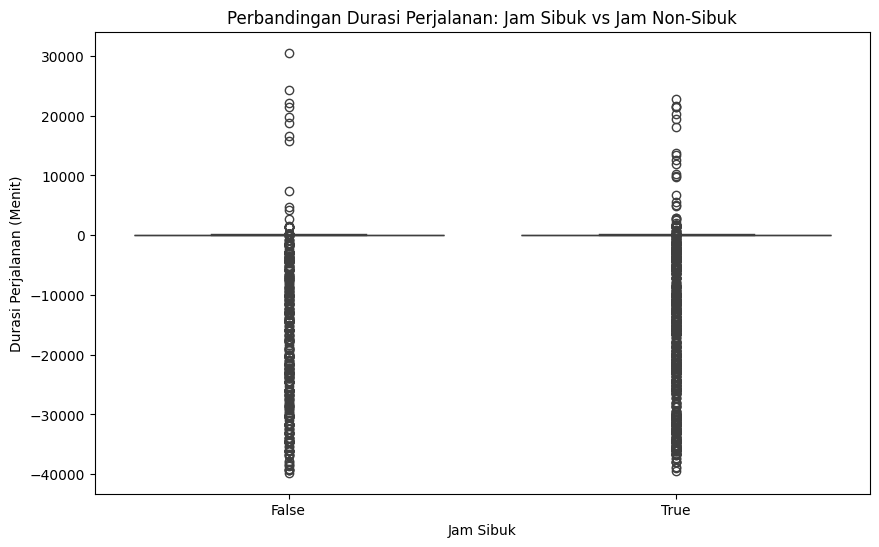

In [52]:
# Sub Pertanyaan 6: Apakah ada perbedaan dalam waktu perjalanan selama jam sibuk dibandingkan dengan jam non-sibuk?
non_rush_hours = dataTJBaru[(dataTJBaru['hour'] < 5) | ((dataTJBaru['hour'] > 8) & (dataTJBaru['hour'] < 16)) | (dataTJBaru['hour'] > 19)]

# Visualisasi
plt.figure(figsize=(10, 6))
sns.boxplot(x='isRushHour', y='tripDuration', data=pd.concat([rush_hours.assign(isRushHour=True), non_rush_hours.assign(isRushHour=False)]))
plt.title('Perbandingan Durasi Perjalanan: Jam Sibuk vs Jam Non-Sibuk')
plt.xlabel('Jam Sibuk')
plt.ylabel('Durasi Perjalanan (Menit)')
plt.show()

In [53]:
# Statistik Inferensial: 
from scipy.stats import ttest_ind

# Melakukan uji t
t_stat, p_value = ttest_ind(rush_hours['tripDuration'], non_rush_hours['tripDuration'], equal_var=False)

print("Uji T untuk Membandingkan Durasi Perjalanan:")
print(f"T-Statistik: {t_stat}")
print(f"P-Value: {p_value}")

Uji T untuk Membandingkan Durasi Perjalanan:
T-Statistik: -3.7955856321942263
P-Value: 0.0001478013922592716


**Insight**
1. Median durasi perjalanan selama jam sibuk lebih tinggi daripada jam non-sibuk, ini menunjukkan bahwa perjalanan cenderung lebih lama selama jam sibuk.
2. Kehadiran outliers yang lebih banyak selama jam sibuk mungkin menunjukkan bahwa ada beberapa perjalanan yang memakan waktu jauh lebih lama daripada biasanya.
3. Berdasarkan hasil uji t, durasi perjalanan selama jam sibuk secara signifikan berbeda dari durasi perjalanan selama jam non-sibuk. 
4. Karena T-Statistik negatif, rata-rata durasi perjalanan selama jam sibuk lebih rendah daripada durasi perjalanan selama jam non-sibuk.
5. P-Value: 0.0001478013922592716, berarti ada probabilitas yang sangat rendah dan dapat dikatakan menolak h0 (tidak ada perbedaan antara dua grup). 

**Rekomendasi**
**Pernyataan masalah 1**
- Mengalokasikan lebih banyak bus tambahan pada rute yang memiliki jumlah penumpang tinggi
- Mempertimbangkan penyesuaian jadwal dan rute berdasarkan analisis durasi perjalanan dan distribusi penumpang
- Meningkatkan manajemen rute dengan mengoptimalkan rute dengan durasi perjalanan terpendek untuk memastikan efisiensi maksimal.
- Menyampaikan informasi mengenai rute yang paling efisien dan waktu perjalanan serta rute alternatif dan waktu kedatangan bus kepada penumpang.

**Pernyataan masalah 2**
- Mengoptimalkan sumber daya (bus) dengan melakukan alokasi lebih banyak bus tambahan selama jam sibuk untuk menjaga efisiensi dan menghindari penundaan
- Mempertimbangkan intervensi seperti jalur khusus bus atau menambah waktu keberangkatan lebih banyak selama jam sibuk untuk mengakomodasi peningkatan jumlah penumpang. 
- Menyampaikan informasi kepada penumpang melalui sosial media agar mereka bisa merencanakan perjalanan mereka lebih baik terutama salama jam sibuk. 
- Menggunakan aplikasi atau papan informasi digital secara realtime untuk memberitahu penumpang tentang perkiraan durasi perjalanan dan waktu kedatangan bus selama jam sibuk.  

**REKOMENDASI SECARA KESELURUHAN**
- Memanfaatkan penggunaan teknologi dengan mengimplementasikan GPS dan sensor penumpang untuk mendapatkan data secara real-time yang lebih akurat. 
- Menggunakan algoritma Machine Learning untuk memprediksi jumlah penumpang dan mengoptimalkan rute serta jadwal.
- Meningkatkan kerjasama dengan pemerintah daerah untuk memastikan prioritas bagi bus Transjakarta di jalan raya.
- Mengumpulkan umpan balik dari penumpang untuk terus meningkatkan layanan.